## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """

    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1,0.3,0.5]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp in Dropout_EXP:
    
    keras.backend.clear_session() # clear old graph
    print("Experiment with dropout rate = " + str(drp))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp = "dropout rate = " + str(drp)
    results[exp] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}




Experiment with dropout rate = 0.1


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)             

50000/50000 [==============================] - 6s 128us/step - loss: 1.3300 - acc: 0.5264 - val_loss: 1.3518 - val_acc: 0.5206
Epoch 26/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3199 - acc: 0.5311 - val_loss: 1.3482 - val_acc: 0.5244
Epoch 27/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3079 - acc: 0.5371 - val_loss: 1.3378 - val_acc: 0.5244
Epoch 28/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2957 - acc: 0.5420 - val_loss: 1.3446 - val_acc: 0.5219
Epoch 29/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2880 - acc: 0.5414 - val_loss: 1.3416 - val_acc: 0.5245
Epoch 30/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.2798 - acc: 0.5466 - val_loss: 1.3259 - val_acc: 0.5318
Epoch 31/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2668 - acc: 0.5513 - val_loss: 1.3233 - val_acc: 0.5310
Epoch 32/50
50000/50000 [=============

50000/50000 [==============================] - 6s 127us/step - loss: 1.5291 - acc: 0.4558 - val_loss: 1.4495 - val_acc: 0.4846
Epoch 24/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5289 - acc: 0.4566 - val_loss: 1.4423 - val_acc: 0.4838
Epoch 25/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5143 - acc: 0.4598 - val_loss: 1.4407 - val_acc: 0.4901
Epoch 26/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5086 - acc: 0.4611 - val_loss: 1.4337 - val_acc: 0.4914
Epoch 27/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5011 - acc: 0.4648 - val_loss: 1.4233 - val_acc: 0.4877
Epoch 28/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4891 - acc: 0.4703 - val_loss: 1.4083 - val_acc: 0.4968
Epoch 29/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4782 - acc: 0.4730 - val_loss: 1.4150 - val_acc: 0.4953
Epoch 30/50
50000/50000 [==============

50000/50000 [==============================] - 6s 117us/step - loss: 1.7578 - acc: 0.3675 - val_loss: 1.6225 - val_acc: 0.4285
Epoch 22/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7458 - acc: 0.3725 - val_loss: 1.6162 - val_acc: 0.4299
Epoch 23/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7466 - acc: 0.3742 - val_loss: 1.6109 - val_acc: 0.4249
Epoch 24/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7389 - acc: 0.3766 - val_loss: 1.5906 - val_acc: 0.4377
Epoch 25/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.7319 - acc: 0.3771 - val_loss: 1.5933 - val_acc: 0.4321
Epoch 26/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.7196 - acc: 0.3816 - val_loss: 1.5840 - val_acc: 0.4404
Epoch 27/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7192 - acc: 0.3818 - val_loss: 1.5802 - val_acc: 0.4394
Epoch 28/50
50000/50000 [==============

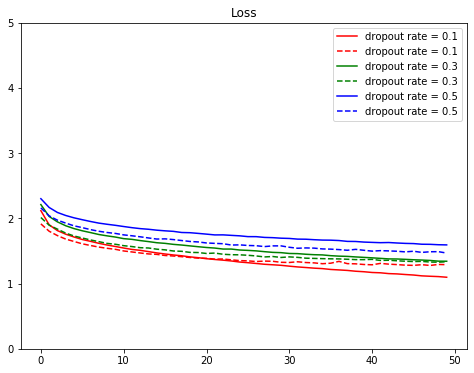

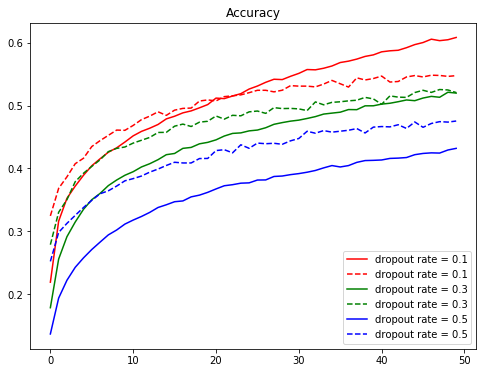

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
drp = 0.1   

keras.backend.clear_session() # clear old graph
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 9s 172us/step - loss: 1.1509 - acc: 0.5842 - val_loss: 1.3428 - val_acc: 0.5294
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.1492 - acc: 0.5853 - val_loss: 1.3511 - val_acc: 0.5294


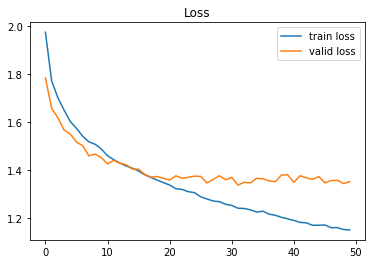

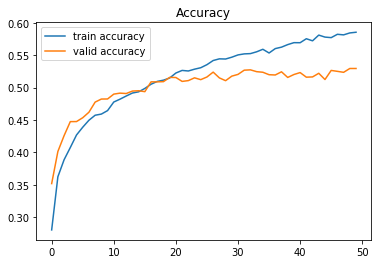

In [12]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()